In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
# Import necessary libraries
from kokoro import KPipeline
from IPython.display import Audio
import soundfile as sf

# Initialize the pipeline with American English
pipeline = KPipeline(lang_code='a')

# Test text
text = "Hello! This is a test of the Kokoro text-to-speech system."

# Generate audio
generator = pipeline(text, voice='af_heart', speed=1)

# Display the first (and only) audio segment
for (text, phonemes, audio) in generator:
    print("Text:", text)
    print("Phonemes:", phonemes)
    display(Audio(data=audio, rate=24000, autoplay=True))

/Users/adrianlyjak/dev/kokoro/.venv/lib/python3.11/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
/Users/adrianlyjak/dev/kokoro/.venv/lib/python3.11/site-packages/torch/nn/utils/weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


pack torch.Size([510, 1, 256])
Text: Hello! This is a test of the Kokoro text-to-speech system.
Phonemes: həlˈO! ðˌɪs ɪz ɐ tˈɛst ʌv ðə kəkˈɔɹO tˈɛksttəspˈiʧ sˈɪstəm.


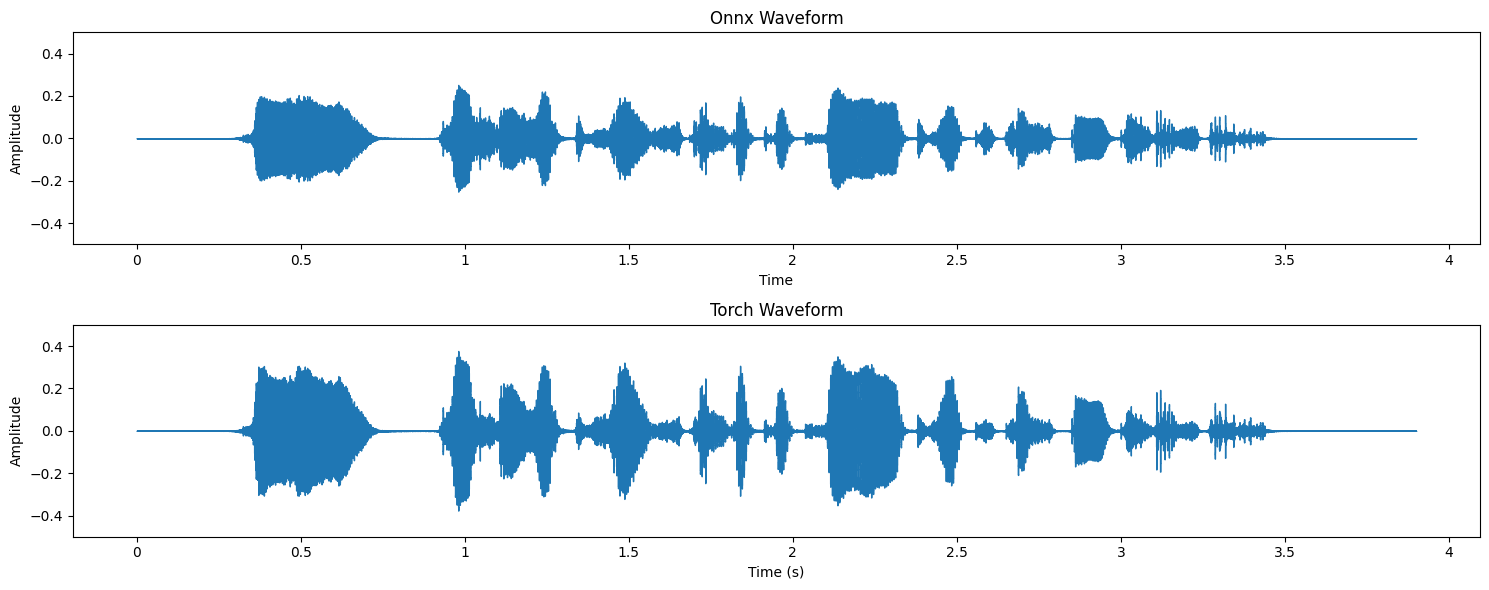

In [3]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load the audio files
audio1, sr1 = librosa.load('onnx_output.wav')
audio2, sr2 = librosa.load('torch_output.wav')

# Create the plot
plt.figure(figsize=(15, 6))

# Plot first audio waveform
plt.subplot(2, 1, 1)
librosa.display.waveshow(audio1, sr=sr1)
plt.title('Onnx Waveform')
plt.ylabel('Amplitude')
plt.ylim(-0.5, 0.5)

# Plot second audio waveform
plt.subplot(2, 1, 2)
librosa.display.waveshow(audio2, sr=sr2)
plt.title('Torch Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.ylim(-0.5, 0.5)

# Adjust layout and display
plt.tight_layout()
plt.show()